**Análise das Despesas Pagas pelo município do Rio de Janeiro para o Ensino Fundamental**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.float_format', '{:.3f}'.format)

In [2]:
siconfi=pd.read_csv('siconfi.csv')
siconfi

c:\Users\tiago\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py:3135: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,ano,sigla_uf,id_municipio,estagio,portaria,conta,estagio_bd,id_conta_bd,conta_bd,valor
0,2004,AC,1200013,NaN,NaN,Despesas por Função,Despesas Empenhadas,3.00.000,Despesas Exceto Intraorçamentárias,6477223.850
1,2004,AC,1200054,NaN,NaN,Despesas por Função,Despesas Empenhadas,3.00.000,Despesas Exceto Intraorçamentárias,4254313.740
2,2004,AC,1200104,NaN,NaN,Despesas por Função,Despesas Empenhadas,3.00.000,Despesas Exceto Intraorçamentárias,12280597.340
3,2004,AC,1200138,NaN,NaN,Despesas por Função,Despesas Empenhadas,3.00.000,Despesas Exceto Intraorçamentárias,4612376.580
4,2004,AC,1200179,NaN,NaN,Despesas por Função,Despesas Empenhadas,3.00.000,Despesas Exceto Intraorçamentárias,4627643.780
...,...,...,...,...,...,...,...,...,...,...
15126321,2020,TO,1714203,Inscrição de Restos a Pagar Processados,23.695,Turismo,Inscrição de Restos a Pagar Processados,3.23.695,Turismo,24410.940
15126322,2020,TO,1714203,Inscrição de Restos a Pagar Processados,26.000,Transporte,Inscrição de Restos a Pagar Processados,3.26.000,Transporte,5880.410
15126323,2020,TO,1714203,Inscrição de Restos a Pagar Processados,26.782,Transporte Rodoviário,Inscrição de Restos a Pagar Processados,3.26.782,Transporte Rodoviário,5880.410
15126324,2020,TO,1714203,Inscrição de Restos a Pagar Processados,27.000,Desporto e Lazer,Inscrição de Restos a Pagar Processados,3.27.000,Desporto e Lazer,2744.000


In [3]:
#descubro os tipos de estagios presentes na tabela

estagios=siconfi['estagio'].unique()

print(estagios)

[nan 'Despesas Empenhadas' 'Despesas Liquidadas' 'Despesas Pagas'
 'Inscrição de RP Não Processados' 'Inscrição de RP Processados'
 'Inscrição de Restos a Pagar Não Processados'
 'Inscrição de Restos a Pagar Processados']


In [4]:
#filtro para o município do Rio e o estágio de Despesas Pagas e seleciono as colunas que irei analisar
#além de descobrir quais são as contas que estão em Despesas Pagas

siconfi_rio=siconfi[(siconfi['id_municipio']==3304557) & (siconfi['estagio']=='Despesas Pagas')]

colunas=['ano', 'conta', 'valor']

siconfi_rio=siconfi_rio[colunas]

contas=siconfi_rio['conta'].unique()

print(contas)

siconfi_rio.head()

['Despesas (Exceto Intraorçamentárias)' 'Legislativa' 'Ação Legislativa'
 'Controle Externo' 'Judiciária' 'Ação Judiciária'
 'Demais Subfunções Judiciária' 'Administração' 'Administração Geral'
 'Administração Financeira' 'Normatização e Fiscalização'
 'Tecnologia da Informação' 'Ordenamento Territorial'
 'Formação de Recursos Humanos' 'Comunicação Social'
 'Demais Subfunções Administração' 'Segurança Pública' 'Policiamento'
 'Defesa Civil' 'Demais Subfunções Segurança Pública' 'Assistência Social'
 'Assistência ao Idoso' 'Assistência ao Portador de Deficiência'
 'Assistência à Criança e ao Adolescente' 'Assistência Comunitária'
 'Demais Subfunções Assistência Social' 'Previdência Social'
 'Previdência do Regime Estatutário' 'Previdência Complementar'
 'Demais Subfunções Previdência Social' 'Saúde' 'Atenção Básica'
 'Assistência Hospitalar e Ambulatorial'
 'Suporte Profilático e Terapêutico' 'Vigilância Sanitária'
 'Vigilância Epidemiológica' 'Demais Subfunções Saúde' 'Trabalho'
 'Dema

,ano,conta,valor
7963801,2013,Despesas (Exceto Intraorçamentárias),17460720781.200
7963802,2013,Legislativa,520702787.380
7963803,2013,Ação Legislativa,358797434.040
7963804,2013,Controle Externo,161905353.340
7963805,2013,Judiciária,67431576.390


In [5]:
#filtro para a conta relacionada ao Ensino Fundamental e para os anos menores de 2019 para alinhar a análise com
#com os outros indicadores

siconfi_rio_ef=siconfi_rio[(siconfi_rio['conta']=='Ensino Fundamental') & (siconfi_rio['ano']<=2019)]

siconfi_rio_ef=siconfi_rio_ef.dropna(axis=0)

siconfi_rio_ef

,ano,conta,valor
7963841,2013,Ensino Fundamental,2700569199.930
8904062,2014,Ensino Fundamental,2617993505.310
9853669,2015,Ensino Fundamental,3120391550.970
10786419,2016,Ensino Fundamental,3345557455.050
11699675,2017,Ensino Fundamental,3190382591.980
12791290,2018,Ensino Fundamental,3280636156.300
13799585,2019,Ensino Fundamental,3657023514.240


Text(0.5, 1.0, 'Despesas Pagas do Ensino Fundamental')

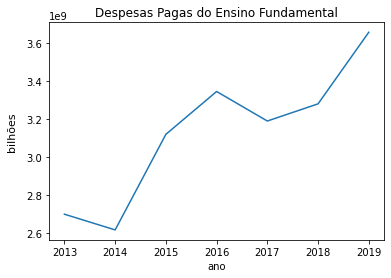

In [6]:
#gráfico de Despesas Pagas para o Ensino Fundamental

plt.plot(siconfi_rio_ef['ano'], siconfi_rio_ef['valor'])

plt.ylabel("bilhões", fontsize=11, labelpad=9)

plt.xlabel("ano")

plt.title("Despesas Pagas do Ensino Fundamental")

**Para analisar se o aumento das despesas pagas para o Ensino Fundamental carioca está bom a nível estadual, irei analisar os aumentos percentuais das despesas dos municípios do estado Rio de Janeiro**

In [7]:
#monto uma tabela com as despesas pagas dos municipios do Rio no ensino fundamental

siconfi_rio_es=siconfi[(siconfi['sigla_uf']=='RJ') & (siconfi['estagio']=='Despesas Pagas') & (siconfi['conta']=='Ensino Fundamental')]

colunas2=['ano', 'id_municipio', 'conta', 'valor']

siconfi_rio_es=siconfi_rio_es[colunas2]

siconfi_rio_es=siconfi_rio_es.dropna(axis=0)

siconfi_rio_es

,ano,id_municipio,conta,valor
7962483,2013,3303856,Ensino Fundamental,12711415.670
7962687,2013,3302056,Ensino Fundamental,7927922.090
7962880,2013,3301157,Ensino Fundamental,10283325.220
7963092,2013,3305901,Ensino Fundamental,6839862.570
7963271,2013,3303104,Ensino Fundamental,8290040.860
...,...,...,...,...
14782249,2020,3300803,Ensino Fundamental,26281175.370
14782499,2020,3300704,Ensino Fundamental,131194001.360
14782747,2020,3305109,Ensino Fundamental,58389481.320
14782951,2020,3301603,Ensino Fundamental,9066128.020


In [8]:
#pego as despesas pagas do ano de 2011 e 2019, e monto uma tabela para cada municipio com a diferença entre as despesas

colunas3={'id_municipio':[], 'diff_prc':[]}
diff_siconfi=pd.DataFrame(data=colunas3)

siconfi_2019=siconfi_rio_es[siconfi_rio_es['ano']==2019]

siconfi_2013=siconfi_rio_es[siconfi_rio_es['ano']==2013]

for id in siconfi_2013.index:
    for id2 in siconfi_2019.index:
        if siconfi_2013['id_municipio'][id] == siconfi_2019['id_municipio'][id2]:
            diff=siconfi_2019['valor'][id2]-siconfi_2013['valor'][id]
            diff=diff/siconfi_2013['valor'][id]
            new_row={'id_municipio':siconfi_2013['id_municipio'][id], 'diff_prc':diff}
            diff_siconfi=diff_siconfi.append(new_row, ignore_index=True)

diff_siconfi=diff_siconfi.sort_values(by=['diff_prc'], ascending=False)

diff_siconfi=diff_siconfi.reset_index()

diff_siconfi=diff_siconfi.drop(['index'], 1)

print("A média do aumento percentual das despesas pagas para o Ensino fundamental dos municípios do Rio de Janeiro é", diff_siconfi['diff_prc'].mean())

diff_siconfi

A média do aumento percentual das despesas pagas para o Ensino fundamental dos municípios do Rio de Janeiro é 0.3883523641574613


,id_municipio,diff_prc
0,3303302.000,2.291
1,3302700.000,1.803
2,3302304.000,1.084
3,3305208.000,0.915
4,3301306.000,0.900
...,...,...
84,3303005.000,-0.073
85,3301009.000,-0.103
86,3304110.000,-0.112
87,3305109.000,-0.120


In [9]:
#busco o município do Rio na tabela e imprimo os resultados

for id in diff_siconfi.index:
        if diff_siconfi['id_municipio'][id] == 3304557:
            print("O aumento percentual entre as despesas pagas para o Ensino Fundamental carioca de 2019 para 2013 é", diff_siconfi['diff_prc'][id])
            print("O município do Rio está na {}ª posição dos maiores aumentos percentuais do estado do Rio de Janeiro".format(id+1))

O aumento percentual entre as despesas pagas para o Ensino Fundamental carioca de 2019 para 2013 é 0.3541676748497286
O município do Rio está na 42ª posição dos maiores aumentos percentuais do estado do Rio de Janeiro
